# LetsGrowMoreVIP - Data Science Internship
# Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM

## by - Attar Asfiyan Nazim



# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Loading the Dataset

In [2]:
data = pd.read_csv('stock_market.csv')

In [3]:
#first five rows of the dataset
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
#last five rows of the dataset
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# Sorting the dataset according to the date

In [5]:

data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Index is not in order,Making it in order

In [6]:
df.reset_index(inplace=True)
df.head()


,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Plotting the graph of stocks at Close

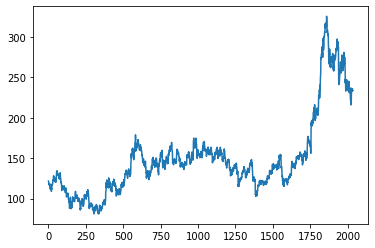

In [7]:
plt.plot(df['Close'])

In [8]:
df1 = df['Close']

# Feature Scaling

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Splitting the data into training and test sets

In [10]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]
training_size, test_size

(1424, 611)

# convert an array of values into a dataset matrix

In [12]:
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

# Reshape input which is required for LSTM

In [18]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# building the model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 18s 412ms/step - loss: 0.0191 - val_loss: 0.0017
Epoch 2/60
19/19 [==============================] - 3s 181ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 3/60
19/19 [==============================] - 3s 180ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 3s 180ms/step - loss: 9.0558e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 181ms/step - loss: 7.8667e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 180ms/step - loss: 8.4448e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 180ms/step - loss: 8.1533e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 3s 179ms/step - loss: 7.9867e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 196ms/step - loss: 7.3141e-04 - val_loss: 9.8043e-04
Epoch 10/60
19/19 [==============================] - 4s 192ms/step - lo

# Prediction of scaled test set

In [22]:
test_predict = model.predict(X_test)



# transform to original test set

In [23]:
test_predict1 = scaler.inverse_transform(test_predict)
test_predict1

array([[140.07759 ],
       [140.37096 ],
       [139.85887 ],
       [137.90547 ],
       [136.12605 ],
       [135.08089 ],
       [135.4677  ],
       [136.65636 ],
       [137.42473 ],
       [137.56342 ],
       [137.47296 ],
       [138.15599 ],
       [138.82924 ],
       [140.10689 ],
       [142.0071  ],
       [141.37144 ],
       [139.63977 ],
       [138.69429 ],
       [138.62686 ],
       [141.87796 ],
       [145.92691 ],
       [148.98189 ],
       [150.4114  ],
       [149.42233 ],
       [148.68268 ],
       [147.9576  ],
       [147.87619 ],
       [149.00516 ],
       [149.96518 ],
       [150.3952  ],
       [150.79114 ],
       [150.04753 ],
       [147.5414  ],
       [142.81738 ],
       [138.90799 ],
       [136.88612 ],
       [136.37491 ],
       [135.85089 ],
       [134.3676  ],
       [131.57938 ],
       [128.99712 ],
       [127.249146],
       [125.26916 ],
       [124.14667 ],
       [122.526436],
       [120.436325],
       [119.34736 ],
       [118.7

# Performance Metrics
## Mean Square error

In [24]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) 

0.0707309803441532

# MSE Is low